In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weight-height.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


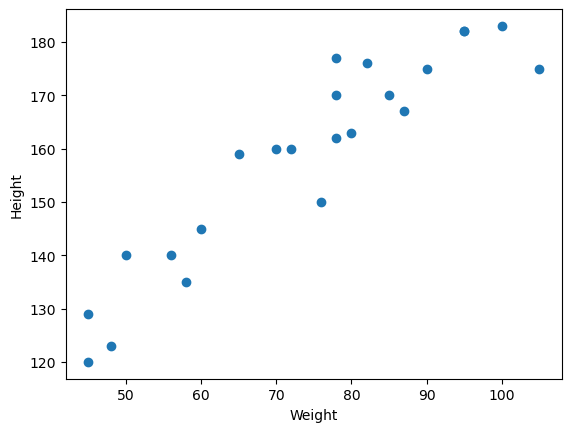

In [3]:
#scatter plot
x = df["Weight"]
y = df["Height"]
plt.scatter(x, y)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [4]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


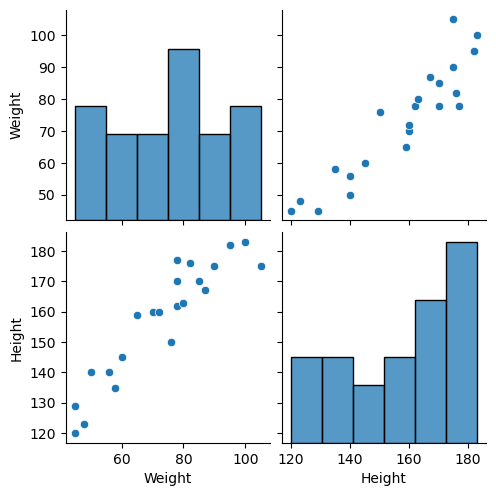

In [5]:
import seaborn as sns

sns.pairplot(df)

In [6]:
X = df[["Weight"]] #independent feature must be dataFrame of 2D Arrray
y = df["Height"] #dependernt featutre it should be series or 1D Arrray

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#make dataset to trainign and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [10]:
#apply standardization
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [12]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [13]:
#Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [40]:
model_l = LinearRegression()

In [41]:
model_l.fit(X_train, y_train)

LinearRegression()

In [43]:
model_l.coef_

array([17.2982057])

In [44]:
model_l.intercept_

156.47058823529412

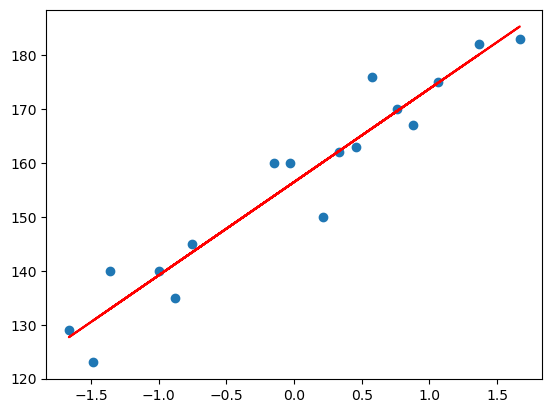

In [45]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model_l.predict(X_train), color="red")

In [46]:
#pediction for test data
y_predict = model_l.predict(X_test)
y_predict

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [23]:
# performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

mse, mae,rmse

(114.84069295228699, 9.665125886795005, 10.716374991212605)

In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test, y_predict)
score

0.7360826717981276

In [27]:
# OLS Linear Regression
import statsmodels.api as sm

In [32]:
model = sm.OLS(y_train, X_train).fit()

In [33]:
model.predict(X_test)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                       0.664
Time:                        06:56:59   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

E:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [47]:
## Prediction to New data
model_l.predict(scaler.transform([[72]]))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])